# Assignment 5: Network Models and Statistical Analysis

In [43]:
import random
import itertools

import networkx as nx
from networkx.algorithms.community import louvain_communities
import numpy as np
import sklearn.metrics
import random

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from typing import Tuple, List, Dict, Union
from scipy.stats import ttest_1samp

from tqdm import tqdm

import colorsys

## Part 1: Structural Properties of the Graph

In [2]:
def load_football_graph() -> nx.Graph:    
    G = nx.read_gml("football.gml")
    return G    

In [3]:
G = load_football_graph()
degree_sequence = [d for n, d in G.degree()]
print(degree_sequence)

[12, 12, 12, 12, 11, 12, 12, 12, 11, 11, 10, 10, 10, 11, 10, 12, 11, 11, 11, 11, 11, 11, 11, 11, 10, 11, 10, 11, 9, 11, 11, 11, 11, 10, 11, 11, 8, 11, 11, 11, 11, 10, 7, 11, 11, 11, 11, 11, 11, 11, 9, 11, 10, 12, 10, 11, 10, 10, 10, 8, 11, 11, 11, 9, 11, 11, 11, 12, 11, 11, 11, 10, 11, 11, 11, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 9, 11, 11, 12, 11, 9, 11, 11, 10, 10, 10, 10, 8, 11, 10, 11, 10, 10, 10, 12, 10, 11, 10, 10, 11, 11, 11, 10, 10, 11]


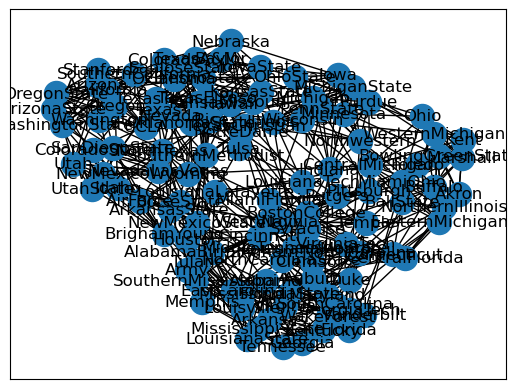

In [5]:
nx.draw_networkx(G, with_labels=True)

In [5]:
G.nodes(data=True)

NodeDataView({'BrighamYoung': {'value': 7}, 'FloridaState': {'value': 0}, 'Iowa': {'value': 2}, 'KansasState': {'value': 3}, 'NewMexico': {'value': 7}, 'TexasTech': {'value': 3}, 'PennState': {'value': 2}, 'SouthernCalifornia': {'value': 8}, 'ArizonaState': {'value': 8}, 'SanDiegoState': {'value': 7}, 'Baylor': {'value': 3}, 'NorthTexas': {'value': 10}, 'NorthernIllinois': {'value': 6}, 'Northwestern': {'value': 2}, 'WesternMichigan': {'value': 6}, 'Wisconsin': {'value': 2}, 'Wyoming': {'value': 7}, 'Auburn': {'value': 9}, 'Akron': {'value': 6}, 'VirginiaTech': {'value': 1}, 'Alabama': {'value': 9}, 'UCLA': {'value': 8}, 'Arizona': {'value': 8}, 'Utah': {'value': 7}, 'ArkansasState': {'value': 10}, 'NorthCarolinaState': {'value': 0}, 'BallState': {'value': 6}, 'Florida': {'value': 9}, 'BoiseState': {'value': 11}, 'BostonCollege': {'value': 1}, 'WestVirginia': {'value': 1}, 'BowlingGreenState': {'value': 6}, 'Michigan': {'value': 2}, 'Virginia': {'value': 0}, 'Buffalo': {'value': 6}, 'S

In [7]:
test_comms = nx.community.louvain_communities(G)

In [8]:
len(test_comms)

10

In [11]:
comm_list = []
for i, comm in enumerate(test_comms):
    for x in comm:
        comm_list.append(i)
        
print(comm_list)
print(len(comm_list))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
115


In [52]:
[n[1]['value'] for n in G.nodes(data=True)]

[7,
 0,
 2,
 3,
 7,
 3,
 2,
 8,
 8,
 7,
 3,
 10,
 6,
 2,
 6,
 2,
 7,
 9,
 6,
 1,
 9,
 8,
 8,
 7,
 10,
 0,
 6,
 9,
 11,
 1,
 1,
 6,
 2,
 0,
 6,
 1,
 5,
 0,
 6,
 2,
 3,
 7,
 5,
 6,
 4,
 0,
 11,
 2,
 4,
 11,
 10,
 8,
 3,
 11,
 6,
 1,
 9,
 4,
 11,
 10,
 2,
 6,
 9,
 10,
 2,
 9,
 4,
 11,
 8,
 10,
 9,
 6,
 3,
 11,
 3,
 4,
 9,
 8,
 8,
 1,
 5,
 3,
 5,
 11,
 3,
 6,
 4,
 9,
 11,
 0,
 5,
 4,
 4,
 7,
 1,
 9,
 9,
 10,
 3,
 6,
 2,
 1,
 3,
 0,
 7,
 0,
 2,
 3,
 8,
 0,
 4,
 8,
 4,
 9,
 11]

In [9]:
test_comms

[{'Baylor',
  'Colorado',
  'IowaState',
  'Kansas',
  'KansasState',
  'Missouri',
  'Nebraska',
  'Oklahoma',
  'OklahomaState',
  'Texas',
  'TexasA&M',
  'TexasTech'},
 {'AirForce',
  'ArkansasState',
  'BoiseState',
  'BrighamYoung',
  'ColoradoState',
  'Idaho',
  'NevadaLasVegas',
  'NewMexico',
  'NewMexicoState',
  'NorthTexas',
  'SanDiegoState',
  'Utah',
  'UtahState',
  'Wyoming'},
 {'Clemson',
  'Duke',
  'FloridaState',
  'GeorgiaTech',
  'Maryland',
  'NorthCarolina',
  'NorthCarolinaState',
  'Virginia',
  'WakeForest'},
 {'Alabama',
  'Arkansas',
  'Auburn',
  'CentralFlorida',
  'Florida',
  'Georgia',
  'Kentucky',
  'LouisianaLafayette',
  'LouisianaMonroe',
  'LouisianaState',
  'LouisianaTech',
  'MiddleTennesseeState',
  'Mississippi',
  'MississippiState',
  'SouthCarolina',
  'Tennessee',
  'Vanderbilt'},
 {'Illinois',
  'Indiana',
  'Iowa',
  'Michigan',
  'MichiganState',
  'Minnesota',
  'Northwestern',
  'OhioState',
  'PennState',
  'Purdue',
  'Wisconsin

### 1.1

In [8]:
def calculate_graph_statistics(G: nx.Graph) -> Dict[str, Union[float, List[int]]]:
    
    diameter = nx.diameter(G)
    cpl = nx.average_shortest_path_length(G)
    avg_clust_coeff = nx.average_clustering(G)
    t = nx.transitivity(G)
    a = nx.degree_assortativity_coefficient(G)
    degree_sequence = [d for n, d in G.degree()]
    
    graph_statistics = {
        'diameter': diameter,
        'cpl': cpl,
        'avg_clustering_coefficient': avg_clust_coeff,
        'transitivity': t,
        'assortativity': a,
        'degree_sequence': degree_sequence
    }
   
    return graph_statistics

### 1.2

In [9]:
def sweep_louvain_resolutions(G: nx.Graph, min_resolution: int=1, max_resolution: int=10) -> Tuple[List[int], List[float]]:
    
    ground_truth = [n[1]['value'] for n in G.nodes(data=True)]
    
    resolutions = []
    nmis = []
    
    for i in np.arange(min_resolution, max_resolution+1):
        
        comms = nx.community.louvain_communities(G, resolution=i)
        comm_list = []
        for j, comm in enumerate(comms):
            for x in comm:
                comm_list.append(j)
                
        nmi = sklearn.metrics.cluster.normalized_mutual_info_score(ground_truth, comm_list)
        resolution = i
        
        resolutions.append(resolution)
        nmis.append(nmi)

    return resolutions, nmis


def plot_nmi_vs_resolution(resolutions: List[int], nmis: List[float], save: bool=False) -> None:

    plt.plot(resolutions, nmis, marker='o', linestyle='-')

    plt.xlabel('Resolution')
    plt.ylabel('NMI')
    plt.title('NMI vs Resolution')

    plt.grid(True)

    if save:
        plt.savefig('1_2_1.png')

    plt.show()

In [10]:
sweep_louvain_resolutions(G)

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [0.2110965704386013,
  0.24456643416842433,
  0.2476246488895334,
  0.2777674913233356,
  0.2681923105737684,
  0.2970179110564566,
  0.3049227453366024,
  0.3139167607609994,
  0.3393161103601478,
  0.4260601400436468])

In [11]:
np.arange(1,11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

### 1.3

In [20]:
def calculate_best_partition(G: nx.Graph, resolutions: List[int], nmis: List[float]) -> Tuple[int, List[str]]:
    
    best_res = None
    max_nmi = nmis[0]
    for i, nmi in enumerate(nmis):
        if nmi > max_nmi:
            max_nmi = nmi
            best_res = resolutions[i]
            
    partition = nx.community.louvain_communities(G, resolution=best_res)
    resolution = best_res

    return resolution, partition

def plot_best_partition(G: nx.Graph, partition: List[str], save: bool=False) -> None:

    # Create two subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot the ground truth community assignments
    pos = nx.spring_layout(G)
    communities = [n[1]['value'] for n in G.nodes(data=True)]
    colors = [list(matplotlib.colors.cnames.values())[i] for i in communities]
    nx.draw_networkx(G, pos, node_color=colors, with_labels=True, ax=axs[0])
    axs[0].set_title('Ground Truth')
    
    
    G.nodes['BrighamYoung']['louvain'] = 1
    
    for i, comm in enumerate(partition):
        for node in comm:
            G.nodes[node]['louvain'] = i
            
    pos = nx.spring_layout(G)        
    communities2 = [n[1]['louvain'] for n in G.nodes(data=True)]
    colors2 = [list(matplotlib.colors.cnames.values())[i] for i in communities2]
    nx.draw_networkx(G, pos, node_color=colors2, with_labels=True, ax=axs[1])
    axs[1].set_title('Louvain')
    
    # Adjust the layout to prevent overlap
    plt.tight_layout()
    

    if save:
        plt.savefig('1_2_2.png')

    plt.show()

In [13]:
resolutions, nmis = sweep_louvain_resolutions(G)
best_resolution, partition = calculate_best_partition(G, resolutions, nmis)

In [14]:
list(matplotlib.colors.cnames.values())

['#F0F8FF',
 '#FAEBD7',
 '#00FFFF',
 '#7FFFD4',
 '#F0FFFF',
 '#F5F5DC',
 '#FFE4C4',
 '#000000',
 '#FFEBCD',
 '#0000FF',
 '#8A2BE2',
 '#A52A2A',
 '#DEB887',
 '#5F9EA0',
 '#7FFF00',
 '#D2691E',
 '#FF7F50',
 '#6495ED',
 '#FFF8DC',
 '#DC143C',
 '#00FFFF',
 '#00008B',
 '#008B8B',
 '#B8860B',
 '#A9A9A9',
 '#006400',
 '#A9A9A9',
 '#BDB76B',
 '#8B008B',
 '#556B2F',
 '#FF8C00',
 '#9932CC',
 '#8B0000',
 '#E9967A',
 '#8FBC8F',
 '#483D8B',
 '#2F4F4F',
 '#2F4F4F',
 '#00CED1',
 '#9400D3',
 '#FF1493',
 '#00BFFF',
 '#696969',
 '#696969',
 '#1E90FF',
 '#B22222',
 '#FFFAF0',
 '#228B22',
 '#FF00FF',
 '#DCDCDC',
 '#F8F8FF',
 '#FFD700',
 '#DAA520',
 '#808080',
 '#008000',
 '#ADFF2F',
 '#808080',
 '#F0FFF0',
 '#FF69B4',
 '#CD5C5C',
 '#4B0082',
 '#FFFFF0',
 '#F0E68C',
 '#E6E6FA',
 '#FFF0F5',
 '#7CFC00',
 '#FFFACD',
 '#ADD8E6',
 '#F08080',
 '#E0FFFF',
 '#FAFAD2',
 '#D3D3D3',
 '#90EE90',
 '#D3D3D3',
 '#FFB6C1',
 '#FFA07A',
 '#20B2AA',
 '#87CEFA',
 '#778899',
 '#778899',
 '#B0C4DE',
 '#FFFFE0',
 '#00FF00',
 '#3

In [15]:
partition

[{'BrighamYoung'},
 {'TexasTech'},
 {'PennState'},
 {'SouthernCalifornia'},
 {'Baylor', 'IowaState', 'Missouri', 'Nebraska'},
 {'NevadaLasVegas'},
 {'BallState',
  'CentralMichigan',
  'EasternMichigan',
  'NorthernIllinois',
  'Toledo',
  'WesternMichigan'},
 {'Minnesota', 'OhioState', 'Purdue'},
 {'Iowa'},
 {'Wisconsin'},
 {'ArkansasState',
  'BoiseState',
  'Idaho',
  'NewMexicoState',
  'NorthTexas',
  'UtahState'},
 {'Illinois', 'Indiana', 'Michigan', 'Northwestern'},
 {'Kansas', 'Oklahoma'},
 {'Connecticut', 'Louisville'},
 {'FresnoState',
  'Hawaii',
  'Rice',
  'SanJoseState',
  'TexasChristian',
  'TexasElPaso'},
 {'California', 'OregonState', 'Stanford', 'Washington', 'WashingtonState'},
 {'SouthernMethodist'},
 {'MichiganState'},
 {'Florida',
  'Georgia',
  'Kentucky',
  'SouthCarolina',
  'Tennessee',
  'Vanderbilt'},
 {'FloridaState'},
 {'Tulsa'},
 {'AlabamaBirmingham', 'Army', 'Cincinnati'},
 {'Nevada'},
 {'Akron',
  'BowlingGreenState',
  'Buffalo',
  'Kent',
  'Marshall

### 1.4

In [77]:
def calculate_inter_community_density(G: nx.Graph, partition: list) -> Tuple[np.ndarray, List[int]]:
    
    # Get the number of communities
    num_communities = len(partition)

    # Initialize the density matrix P with zeros
    p = np.zeros((num_communities, num_communities))

    # Create a dictionary to map node IDs to their respective communities
    node_to_community = {}
    for i, comm in enumerate(partition):
        for node in comm:
            node_to_community[node] = i
            
#     comm_sizes = {}
#     for i in range(num_communities):
#         comm_size = 0
#         for node in node_to_community.keys():
#             if node_to_community[node] == i:
#                 comm_size += 1
#         comm_sizes[i] = comm_size

    # Calculate the number of edges between each pair of communities
    for u, v in G.edges:
        if node_to_community[u] != node_to_community[v]:
            comm_u, comm_v = node_to_community[u], node_to_community[v]
            p[comm_u][comm_v] += 1
            p[comm_v][comm_u] += 1

    # Calculate the community sizes
    sizes = [sum(1 for node in node_to_community.values() if node == comm) for comm in range(num_communities)]

    # Normalize the density matrix P by dividing by the community sizes
    for i in range(num_communities):
        for j in range(num_communities):
            p[i][j] /= (sizes[i] * sizes[j])
            p[j][i] /= (sizes[i] * sizes[j])
            

    return p, sizes

def plot_p_matrix(p: np.ndarray, save: bool=False):
    
    # Set the figure size
    plt.figure(figsize=(20, 16))  # Adjust the width and height as per your preference

    # Create a heatmap plot
    plt.imshow(p, cmap='hot', interpolation='nearest')

    # Add colorbar
    plt.colorbar(label='Density')

    # Annotate each cell with the value and adjust text color
    for i in range(p.shape[0]):
        for j in range(p.shape[1]):
            value = p[i, j]
            text_color = 'black' if colorsys.rgb_to_hsv(*plt.cm.hot(value)[:3])[2] > 0.5 else 'white'
            plt.text(j, i, f'{value:.2f}', ha='center', va='center', color=text_color)

    # Set x and y axis labels
    plt.xlabel('Community')
    plt.ylabel('Community')

    # Add a title
    plt.title('Intercommunity Connection Density Matrix')
    
    if save:
        plt.savefig('1_3.png')

    plt.show()

### 1.5

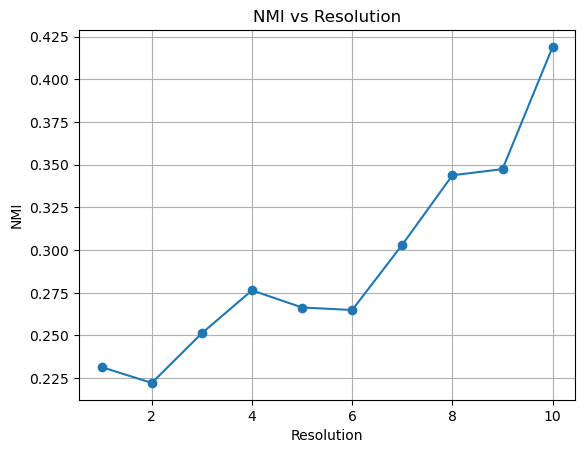

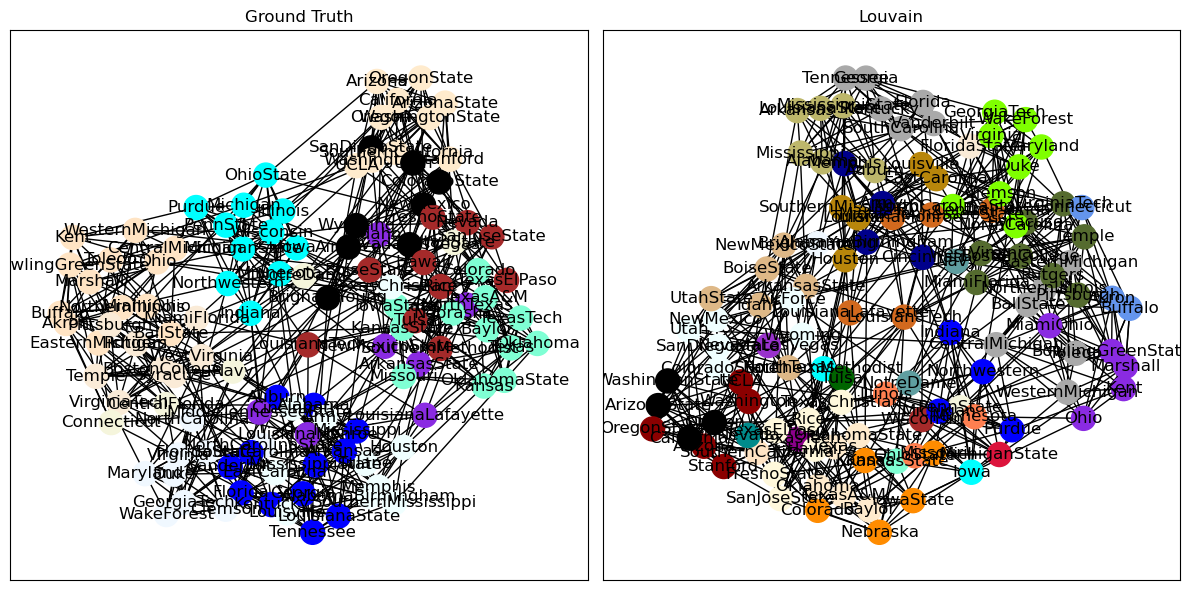

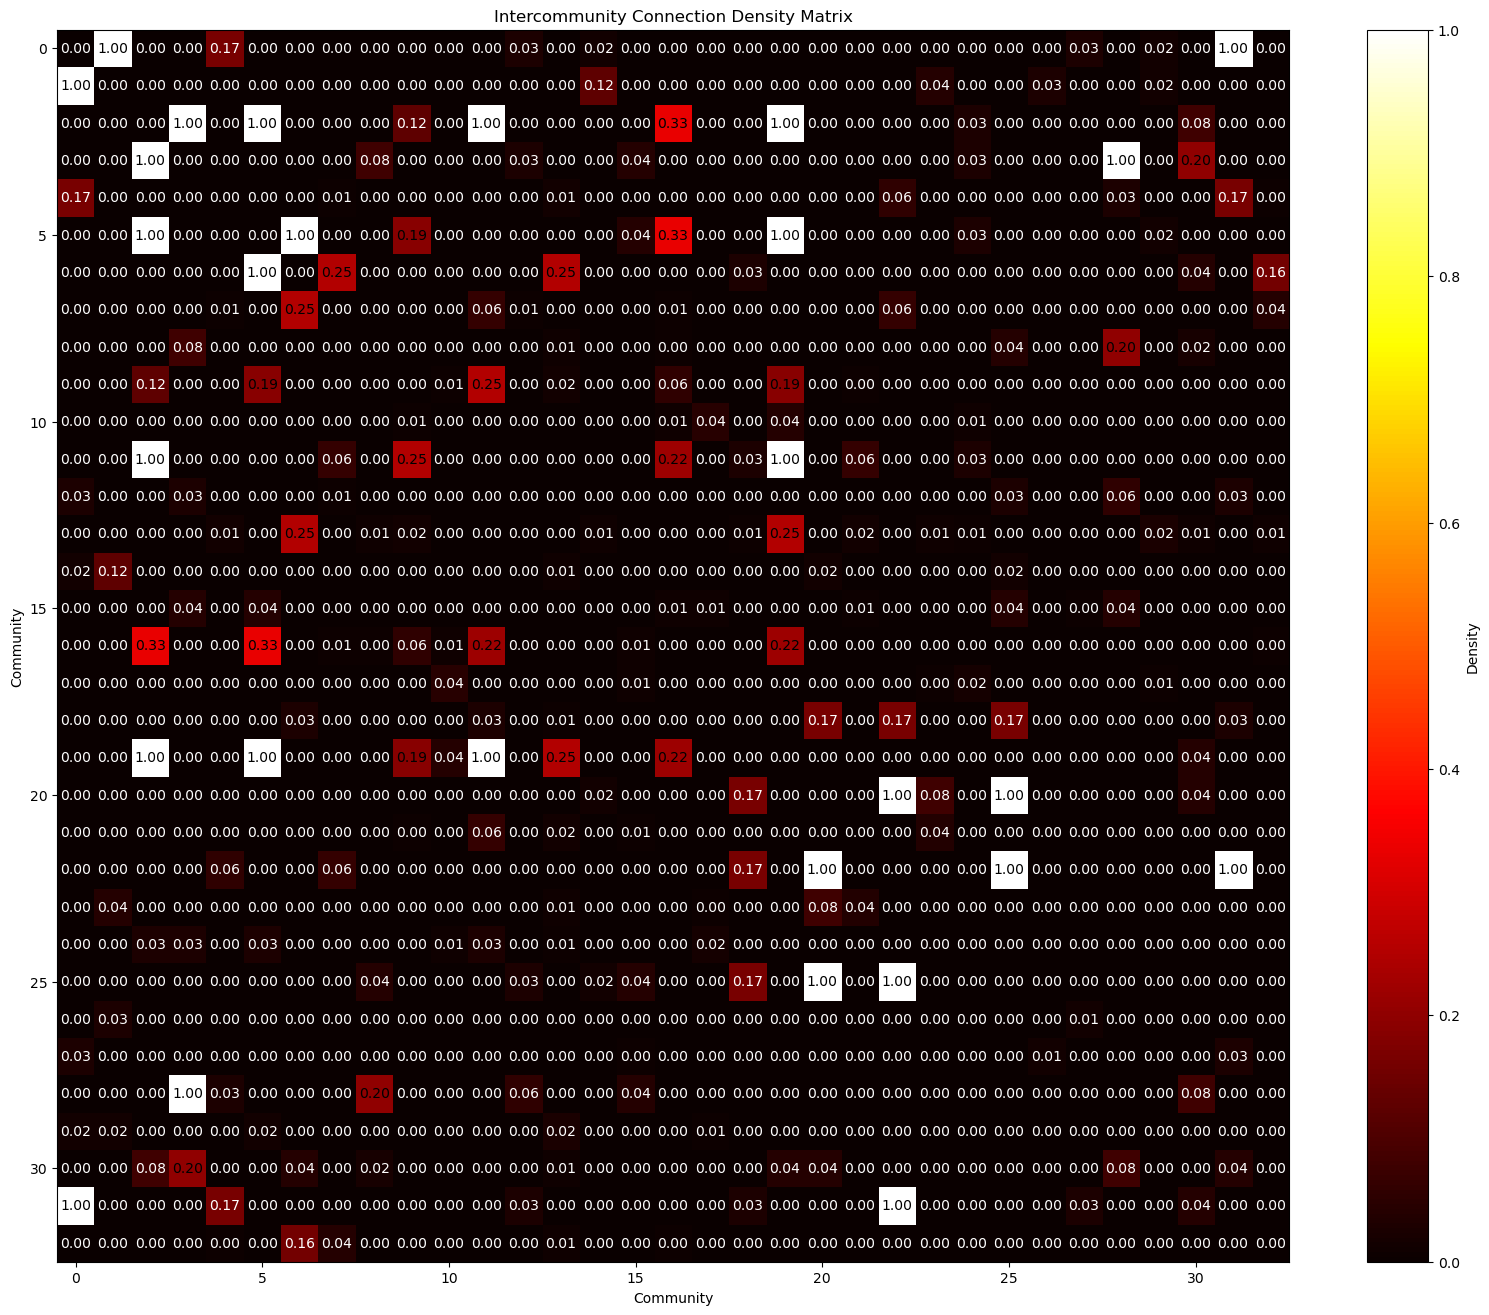

In [78]:
G = load_football_graph()

# 1.1
graph_stats = calculate_graph_statistics(G)

# 1.2 
resolutions, nmis = sweep_louvain_resolutions(G)
best_resolution, partition = calculate_best_partition(G, resolutions, nmis)
plot_nmi_vs_resolution(resolutions, nmis)
plot_best_partition(G, partition)

# 1.3
p, sizes = calculate_inter_community_density(G, partition)
plot_p_matrix(p)


In [79]:
len(partition)

33

### 1.5 Written Response

Answer: As the resolution increases, the NMI increases. The partition for the best NMI is not a good match to the ground truth because the NMI is less 0.5. A score of 1 indicates perfect correlation and a score of 0 indicates no correlation. A score of about 0.5 is basically just an average score, not that great. 

## Part 2: Graph Generators
### 2.1

In [80]:
def generate_configuration_graphs(degree_sequence: List[int], n_graphs: int=100) -> List[nx.Graph]:
    
    graphs = []
    
    for i in range(n_graphs):
        G = nx.configuration_model(degree_sequence, create_using=nx.Graph())
        graphs.append(G)

    return graphs

def generate_sbm_graphs(p: np.ndarray, sizes: List[int], n_graphs: int=100) -> List[nx.Graph]:

    
    graphs = []
    
    for i in range(n_graphs):
        G = nx.stochastic_block_model(sizes=sizes, p=p)
        graphs.append(G)

    return graphs


### 2.2

In [89]:
dendrogram.nodes(data=True)

NodeDataView({'_D0': {'p': 0.018412698412698412, 'orderprop': 'AirForce', 'nR': 70, 'nL': 45, 'e': 58, 'L': -289.1561778052853, 'left': '_D92', 'right': '_D98'}, '_D1': {'p': 0.0, 'orderprop': 'SanJoseState', 'nL': 1, 'nR': 1, 'e': 0, 'L': 0.0, 'left': 'Arizona', 'right': 'California'}, '_D2': {'p': 0.8, 'orderprop': 'AirForce', 'nR': 1, 'nL': 10, 'e': 8, 'L': -5.004024235381879, 'left': '_D18', 'right': 'Indiana'}, '_D3': {'p': 1.0, 'orderprop': 'AirForce', 'nL': 3, 'nR': 2, 'e': 6, 'L': 0.0, 'right': '_D48', 'left': '_D77'}, '_D4': {'p': 1.0, 'orderprop': 'OklahomaState', 'nL': 1, 'nR': 1, 'e': 1, 'L': 0.0, 'right': 'OklahomaState', 'left': 'Texas'}, '_D5': {'p': 0.010101010101010102, 'orderprop': 'AirForce', 'nR': 11, 'nL': 9, 'e': 1, 'L': -5.59005225360835, 'left': '_D94', 'right': '_D2'}, '_D6': {'p': 1.0, 'orderprop': 'LouisianaTech', 'nL': 1, 'nR': 1, 'e': 1, 'L': 0.0, 'left': 'LouisianaLafayette', 'right': 'MiddleTennesseeState'}, '_D7': {'p': 1.0, 'orderprop': 'FloridaState', 

In [84]:
def calculate_edge_probability(dendrogram: nx.DiGraph) -> Dict[str, Dict[str, float]]:

    edge_probs = {}
    
    

    
    return edge_probs

def generate_graph_from_prob(edge_probs: Dict[str, Dict[str, float]]) -> nx.Graph:
    
    H = nx.Graph()

    # Iterate through all pairs of nodes and generate edges based on probabilities
    for node_pair, prob in edge_probs.items():
        node_i, node_j = node_pair.split('-')
        if random.random() < prob:  # Generate an edge with probability p
            H.add_edge(node_i, node_j)

    return H

def generate_hrg_graphs(edge_probs: Dict[str, Dict[str, float]], n_graphs: int=100) -> List[nx.Graph]:

    graphs = []
    for _ in range(n_graphs):
        graph = generate_graph_from_prob(edge_probs)
        graphs.append(graph)

    return graphs

### 2.3

In [85]:
def calculate_generated_statistics(graphs: List[nx.Graph]) -> Dict[str, list]:

    diameters = []
    cpls = []
    avg_clust_coeffs = []
    ts = []
    _as = []
    degree_sequences = []
    
    for graph in graphs:
        diameter = nx.diameter(graph)
        diameters.append(diameter)
        cpl = nx.average_shortest_path_length(graph)
        cpls.append(cpl)
        avg_clust_coeff = nx.average_clustering(graph)
        avg_clust_coeffs.append(avg_clust_coeff)
        t = nx.transitivity(graph)
        ts.append(t)
        a = nx.degree_assortativity_coefficient(graph)
        _as.append(a)
        degree_sequence = [d for n, d in graph.degree()]
        degree_sequences.append(degree_sequence)
    
    
    
    graph_statistics = {
        'diameter': diameters,
        'cpl': cpls,
        'avg_clustering_coefficient': avg_clust_coeffs,
        'transitivity': ts,
        'assortativity': _as,
        'degree_sequence': degree_sequences
    }

    return graph_statistics

def compare_generated_to_ground_truth(ground_truth_features: Dict[str, float], generated_features: Dict[str, List[float]]) -> Dict[str, float]:


    return p_vals


def plot_graph_statistics(graph_statistics: List[Dict[str, list]], save: bool=False) -> None:


    if save:
        plt.savefig('2_3.png')

    plt.show()

### 2.4
This code reruns some calculations from 1.5 to avoid errors, but you can comment it out if you already have the values stored in memory.

In [86]:
G = load_football_graph()
graph_stats = calculate_graph_statistics(G)

# Configuration Model
config_graphs = generate_configuration_graphs(graph_stats['degree_sequence'])

# Stochastic Block Model
resolutions, nmis = sweep_louvain_resolutions(G)
best_resolution, partition = calculate_best_partition(G, resolutions, nmis)
p, sizes = calculate_inter_community_density(G, partition)
print(p.shape)
print(p)
sbm_graphs = generate_sbm_graphs(p, sizes)

# Hierarchical Random Graph Model
dendrogram = nx.read_gml("football-hrg.gml")
edge_probs = calculate_edge_probability(dendrogram)
hrg_graphs = generate_hrg_graphs(edge_probs)

# Calculating network characteristic statistics
config_stats = calculate_generated_statistics(config_graphs)
sbm_stats = calculate_generated_statistics(sbm_graphs)
hrg_stats = calculate_generated_statistics(hrg_graphs)

# Hypothesis Test Stats
print('Configuration Model t-test')
print(compare_generated_to_ground_truth(graph_stats, config_stats))

print('Stochastic Block Model t-test')
print(compare_generated_to_ground_truth(graph_stats, sbm_stats))

print('HRG Model t-test')
print(compare_generated_to_ground_truth(graph_stats, hrg_stats))

plot_graph_statistics([graph_stats, config_stats, sbm_stats, hrg_stats])

(32, 32)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.02777778 0.00111111 0.16666667]
 ...
 [0.         0.         0.02777778 ... 0.         0.2        0.        ]
 [0.         0.         0.00111111 ... 0.2        0.         0.        ]
 [0.         0.         0.16666667 ... 0.         0.         0.        ]]


ValueError: too many values to unpack (expected 2)

In [88]:
dendrogram.nodes(data=True)

NodeDataView({'_D0': {'p': 0.018412698412698412, 'orderprop': 'AirForce', 'nR': 70, 'nL': 45, 'e': 58, 'L': -289.1561778052853, 'left': '_D92', 'right': '_D98'}, '_D1': {'p': 0.0, 'orderprop': 'SanJoseState', 'nL': 1, 'nR': 1, 'e': 0, 'L': 0.0, 'left': 'Arizona', 'right': 'California'}, '_D2': {'p': 0.8, 'orderprop': 'AirForce', 'nR': 1, 'nL': 10, 'e': 8, 'L': -5.004024235381879, 'left': '_D18', 'right': 'Indiana'}, '_D3': {'p': 1.0, 'orderprop': 'AirForce', 'nL': 3, 'nR': 2, 'e': 6, 'L': 0.0, 'right': '_D48', 'left': '_D77'}, '_D4': {'p': 1.0, 'orderprop': 'OklahomaState', 'nL': 1, 'nR': 1, 'e': 1, 'L': 0.0, 'right': 'OklahomaState', 'left': 'Texas'}, '_D5': {'p': 0.010101010101010102, 'orderprop': 'AirForce', 'nR': 11, 'nL': 9, 'e': 1, 'L': -5.59005225360835, 'left': '_D94', 'right': '_D2'}, '_D6': {'p': 1.0, 'orderprop': 'LouisianaTech', 'nL': 1, 'nR': 1, 'e': 1, 'L': 0.0, 'left': 'LouisianaLafayette', 'right': 'MiddleTennesseeState'}, '_D7': {'p': 1.0, 'orderprop': 'FloridaState', 

### 2.4 Written Response

Answer: 

## Part 3: Slashdot Network

In [93]:
def load_slashdot_graph() -> nx.Graph:
    # import "slashdot.txt"
    G = nx.read_edgelist("slashdot.txt", delimiter="\t", create_using=nx.DiGraph)
    G.remove_edges_from(nx.selfloop_edges(G))

    return G

### 3.1

In [120]:
def estimate_network_size(G, sample_sizes: List[int]=[500, 1000, 2000], n_iter: int=1000) -> Dict[str, List[int]]:
    
    results = {}

    for sample_size in sample_sizes:
        estimated_sizes = []

        for _ in range(n_iter):
            # Randomly sample nodes from the network
            sample1 = random.sample(G.nodes(), sample_size)
            sample2 = random.sample(G.nodes(), sample_size)

            unique_nodes = set(sample1 + sample2)
            
            n3 = []
            
            for node in unique_nodes:
                if node in sample1 and node in sample2:
                    n3.append(node)

            # Estimate the network size using the capture-recapture formula
            if len(n3) < 1:
                continue
                
            estimated_size = (len(sample1) * len(sample2)) / len(n3)

            # Append the estimated size to the list
            estimated_sizes.append(int(estimated_size))

        results[sample_size] = estimated_sizes

    return results

def plot_estimate_histogram(estimated_sizes: List[int], true_size: int, save: bool=False) -> None:


    plt.figure(figsize=(10, 6))

    # Plot histogram of estimated sizes
    plt.hist(estimated_sizes, bins=30, alpha=0.7, color='skyblue', edgecolor='black')

    # Plot vertical line for the true network size
    plt.axvline(x=true_size, color='red', linestyle='--', linewidth=2, label='True Size')

    plt.xlabel('Estimated Number of Nodes')
    plt.ylabel('Frequency of Occurrence')
    plt.title('Estimated Network Size Histogram')
    plt.legend()
    
    if save:
        plt.savefig('3_1_1.png')

    plt.show()

def plot_sample_size_error(results: Dict[str, List[int]], true_size: int,
                           sample_sizes: List[int]=[500, 1000, 2000], save: bool=False) -> None:

    plt.figure(figsize=(10, 6))

    # Calculate mean and standard deviation for each sample size
    means = [np.mean(results[sample_size]) for sample_size in sample_sizes]
    stds = [np.std(results[sample_size]) for sample_size in sample_sizes]

    # Plot the mean values with error bars (standard deviation)
    plt.errorbar(sample_sizes, means, yerr=stds, marker='o', capsize=5, color='skyblue', label='Estimated Size')

    # Plot the true network size as a horizontal line
    plt.axhline(y=true_size, color='red', linestyle='--', linewidth=2, label='True Size')

    plt.xlabel('Sample Size')
    plt.ylabel('Estimated Number of Nodes')
    plt.title('Estimated Network Size vs. Sample Size')
    plt.legend()

    if save:
         plt.savefig('3_1_2.png')

    plt.show()


### 3.2

In [121]:
def estimate_edges(G: nx.Graph, n_sample: int=5000, n_iter: int=100) -> List[int]:

    n = G.number_of_nodes()  # Total number of nodes in the network
    estimated_edges = []

    for _ in range(n_iter):
        # Sample n_sample nodes without replacement
        sample_nodes = random.sample(G.nodes(), n_sample)

        # Calculate the number of edges in the induced subgraph
        num_edges = G.subgraph(sample_nodes).number_of_edges()

        # Estimate the number of edges using the Horvitz-Thompson estimator
        edge_estimate = (n * num_edges) / n_sample
        estimated_edges.append(int(edge_estimate))

    return estimated_edges

def plot_edge_estimate_distribution(estimated_edges: List[int], true_edges: int, save: bool=False) -> None:

    plt.hist(estimated_edges, bins='auto', alpha=0.7, color='skyblue', edgecolor='black', label='Estimated Edges')
    plt.axvline(true_edges, color='red', linestyle='dashed', linewidth=2, label='True Edges')
    plt.xlabel('Number of Edges')
    plt.ylabel('Frequency')
    plt.legend()

    if save:
        plt.savefig('3_2.png')

    plt.show()

### 3.3

/var/folders/51/n64xxfwj1k1797dd7bfbl6kr0000gn/T/ipykernel_90962/4100689357.py:10: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sample1 = random.sample(G.nodes(), sample_size)
/var/folders/51/n64xxfwj1k1797dd7bfbl6kr0000gn/T/ipykernel_90962/4100689357.py:11: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sample2 = random.sample(G.nodes(), sample_size)


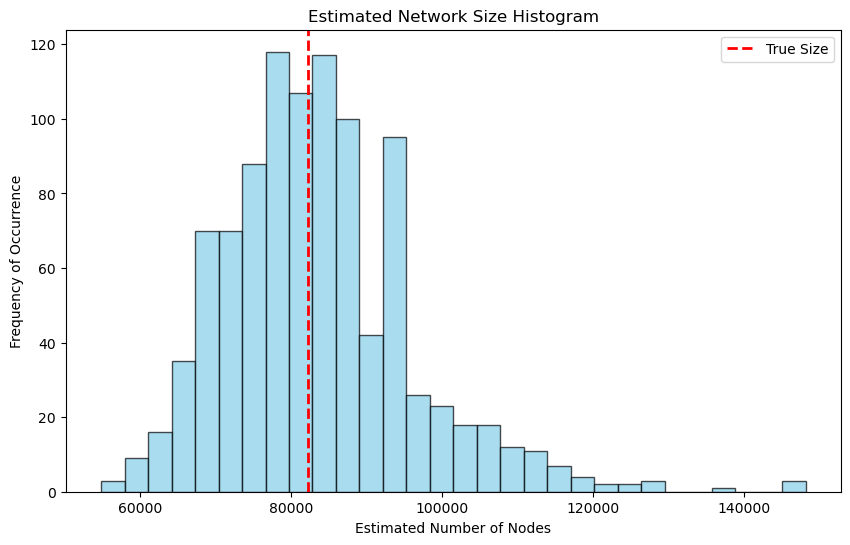

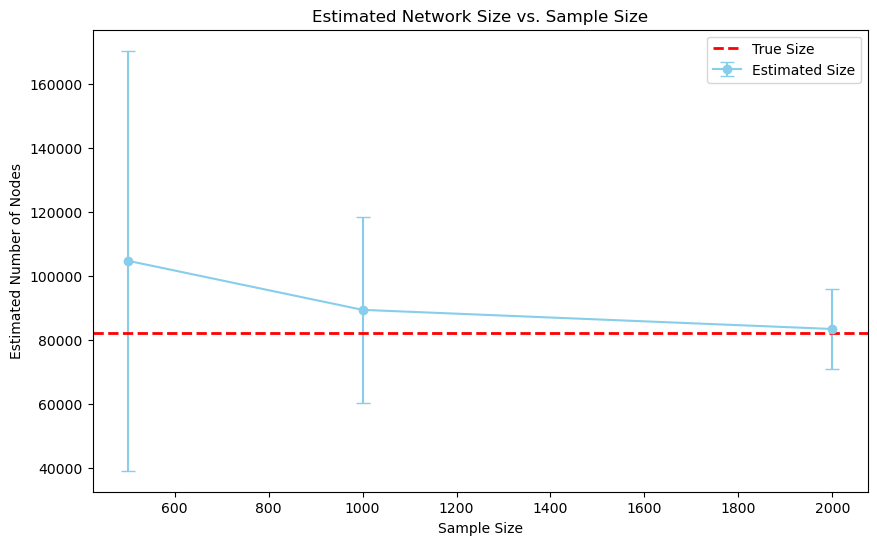

In [122]:
G = load_slashdot_graph()

network_size_estimates = estimate_network_size(G)

plot_estimate_histogram(network_size_estimates[2000], len(G.nodes()))
plot_sample_size_error(network_size_estimates, len(G.nodes()))

# edge_estimates = estimate_edges(G)
# plot_edge_estimate_distribution(edge_estimates, len(G.edges()))



### 3.3 Written Response

Answer: As the sample size increases, the estimated number of nodes decreases and approaches the true number. The minumum number of samples I would choose to estimate is 1000 nodes